In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
RUNS = 1000000

## Plot the Outcomes

In [3]:
import cPickle as pickle

with open('./outcomes_'+str(RUNS)+'.pkl', 'r') as f:
    results = pickle.load(f)

In [4]:
res_sum = float(results[5000]["Win"] + results[5000]["Out of soldiers"] + results[5000]["Farkle"])

print "Win:", results[5000]["Win"] / res_sum
print "Farkle:", results[5000]["Farkle"] / res_sum
print "OOS:", results[5000]["Out of soldiers"] / res_sum

Win: 0.383449
Farkle: 0.612121
OOS: 0.00443


In [5]:
farkle = []
win = []
oos = []
x = []

for key in sorted(results.iterkeys()):
    c = results[key]
    x.append(key)
    farkle.append(c["Farkle"] / float(RUNS)) 
    win.append(c["Win"] / float(RUNS))
    oos.append(c["Out of soldiers"] / float(RUNS))
    
y = np.row_stack((oos, win, farkle))

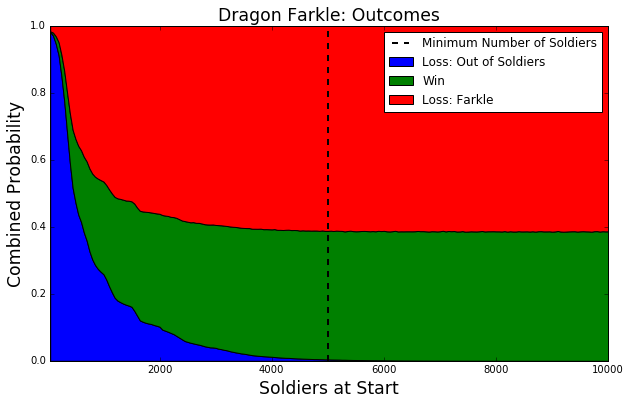

In [6]:
% matplotlib inline

# Set the plot size
WIDTH = 10
HEIGHT = 6
plt.figure(figsize=(WIDTH, HEIGHT))

# Define the ranges
X_MIN=min(x)
X_MAX=max(x)
RANGE = (X_MIN, X_MAX)

plt.xlim(RANGE)

plt.stackplot(x, y, labels=["Loss: Out of Soldiers", "Win", "Loss: Farkle"])

# 5000 Soldiers
line = plt.axvline(
    5000, 
    color="Black", 
    linestyle="dashed", 
    label="Minimum Number of Soldiers",
    linewidth=2,
)


# Set axis labels
FONTSIZE="xx-large"
plt.xlabel('Soldiers at Start', fontsize=FONTSIZE)
plt.ylabel('Combined Probability', fontsize=FONTSIZE)
plt.title("Dragon Farkle: Outcomes", fontsize=FONTSIZE)

# Legend
plt.legend()

# Save and show the figure
plt.savefig("/tmp/dragon_farkle_combined_probability.png", bbox_inches='tight')
plt.savefig("/tmp/dragon_farkle_combined_probability.svg", bbox_inches='tight')

plt.show()

## Plot the Expectation Value

In [7]:
import cPickle as pickle

with open('./expectation_'+str(RUNS)+'.pkl', 'r') as f:
    ev_results = pickle.load(f)

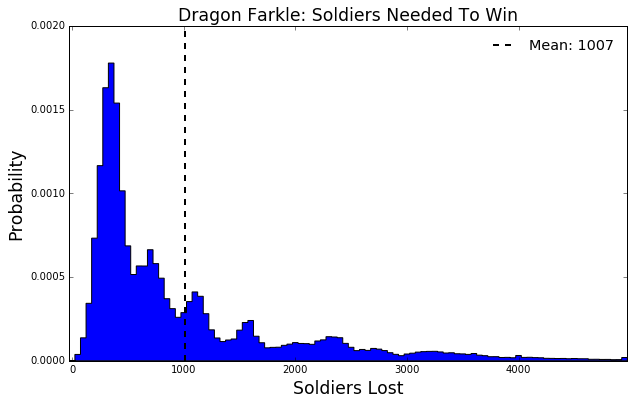

In [8]:
%matplotlib inline

# Set the plot size
WIDTH = 10
HEIGHT = 6

plt.figure(figsize=(WIDTH, HEIGHT))

# Define the ranges
Y_MIN=0
Y_MAX=0.002
plt.ylim((Y_MIN, Y_MAX))

X_MIN=0
X_MAX=5000
BINS = (X_MAX - X_MIN) / 50
RANGE = (X_MIN, X_MAX)

# Set the number of x and y ticks
plt.locator_params(nbins=4, axis="Y")  # Y
plt.xticks(np.arange(X_MIN, X_MAX+1000, 1000))  # X

# Plot the histogram
plt.hist(ev_results, BINS, normed=True, range=RANGE, align='left', histtype='stepfilled')

# Draw a line at the mean
LINESTYLE = "dashed"
COLOR = "black"
WIDTH=2

mean = np.array(ev_results).mean()
line = plt.axvline(
    mean, 
    color=COLOR, 
    linestyle=LINESTYLE, 
    label="Mean: {}".format(int(mean)),
    linewidth=WIDTH,
)

# Set axis labels
FONTSIZE="xx-large"
plt.xlabel('Soldiers Lost', fontsize=FONTSIZE)
plt.ylabel('Probability', fontsize=FONTSIZE)
plt.title("Dragon Farkle: Soldiers Needed To Win", fontsize=FONTSIZE)

# Set up the legend
plt.legend(fontsize="x-large", frameon=False)

# Save and show the figure
plt.savefig("/tmp/dragon_farkle_soldier_expectation_value.png", bbox_inches='tight')
plt.savefig("/tmp/dragon_farkle_soldier_expectation_value.svg", bbox_inches='tight')

plt.show()

## Plot the Expectation Value of Rolls

This plot isn't used in the article, but it is fun to look at.

In [9]:
import cPickle as pickle

with open('./runs_'+str(RUNS)+'.pkl', 'r') as f:
    runs = pickle.load(f)

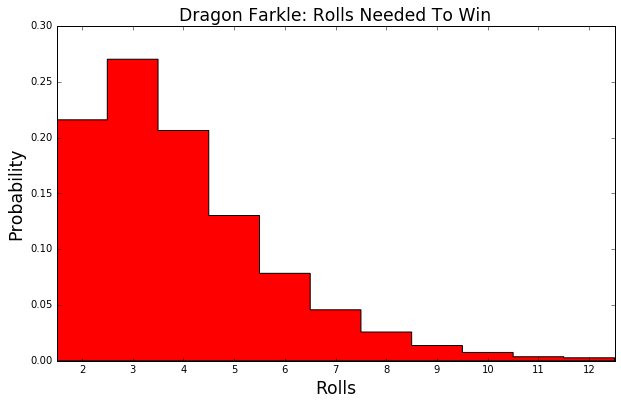

In [10]:
%matplotlib inline

# Set the plot size
WIDTH = 10
HEIGHT = 6

plt.figure(figsize=(WIDTH, HEIGHT))

# Define the ranges
Y_MIN=0
Y_MAX=0.002
#plt.ylim((Y_MIN, Y_MAX))

X_MIN=2
X_MAX=13
BINS = (X_MAX - X_MIN)
RANGE = (X_MIN, X_MAX)

# Set the number of x and y ticks
plt.locator_params(nbins=4, axis="Y")  # Y
plt.xticks(np.arange(X_MIN, X_MAX+1, 1))  # X


# Plot the histogram
plt.hist(runs, BINS, normed=True, range=RANGE, align='left', histtype='stepfilled', color="red")

# Set axis labels
FONTSIZE="xx-large"
plt.xlabel('Rolls', fontsize=FONTSIZE)
plt.ylabel('Probability', fontsize=FONTSIZE)
plt.title("Dragon Farkle: Rolls Needed To Win", fontsize=FONTSIZE)

# Save and show the figure
plt.savefig("/tmp/dragon_farkle_rolls_expectation_value.png", bbox_inches='tight')
plt.savefig("/tmp/dragon_farkle_rolls_expectation_value.svg", bbox_inches='tight')

plt.show()